<a href="https://colab.research.google.com/github/ich-youness/exp_ai/blob/main/AI_explainable_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=59d4f548d40591c46c8063e1ecf480efbbb957d31684622e2b67f8cedba5634e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular


In [ ]:
dataset = datasets.load_diabetes()
features,labels = dataset.data , dataset.target
x_train , x_test , y_train , y_test = train_test_split( features, labels , test_size=0.2 , random_state=13 )
rf_model = RandomForestClassifier(max_depth=20 , random_state=0)
rf_model.fit(x_train  , y_train)

RandomForestClassifier(max_depth=20, random_state=0)

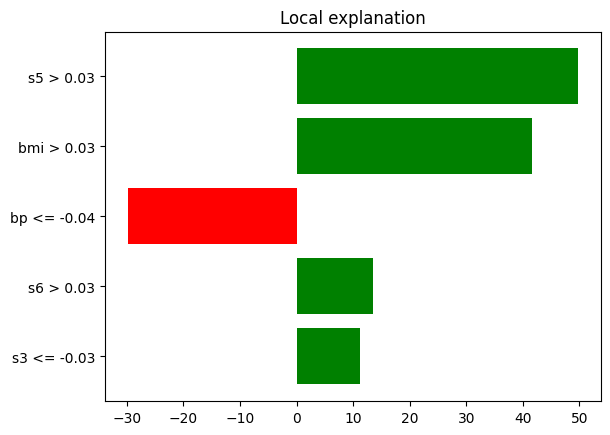

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    x_train,
    feature_names=dataset.feature_names,
    class_names=["disease_progression"],
    mode='regression'
)

exp = explainer.explain_instance(x_test[0] , rf_model.predict , num_features=5)

exp.as_pyplot_figure()
plt.show()

# **SP-LIME**

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

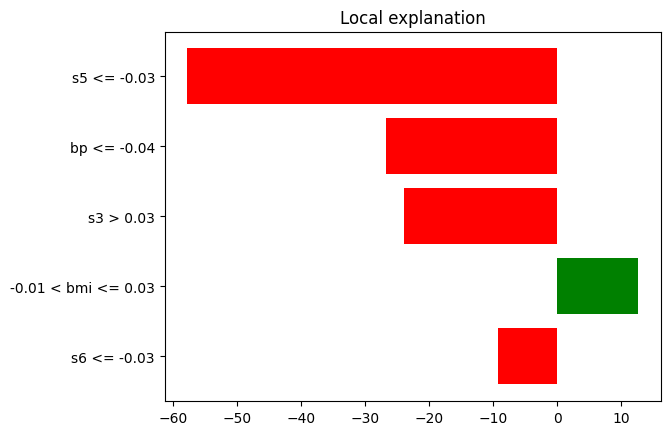

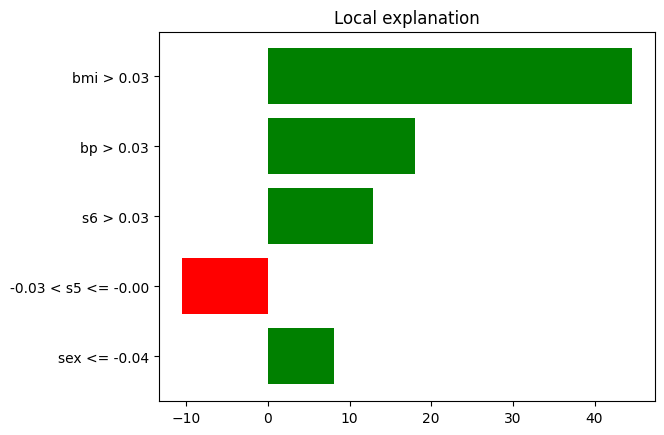

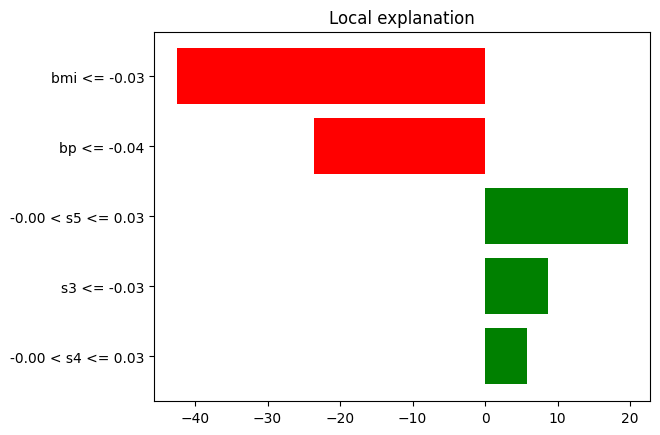

In [ ]:
from lime import submodular_pick

sp_obj = submodular_pick.SubmodularPick(explainer , x_train , rf_model.predict , sample_size=20 , num_features = 5, num_exps_desired=3)

[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations]

# **Texte**

Document id: 0
Predicted class: soc.religion.christian
True class: soc.religion.christian

Explanation:
('of', 0.029316600725602212)
('the', 0.029097392967415044)
('and', 0.02205954156904551)
('The', 0.016893970017827734)
('will', 0.015949534405670672)
('Library', -0.01469785505644029)


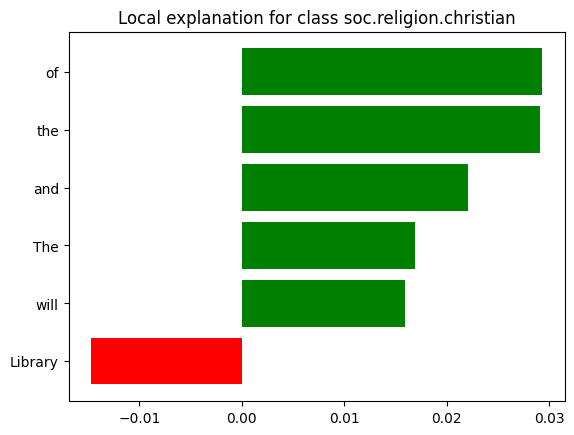

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from lime.lime_text import LimeTextExplainer

# Prepare dataset
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)  # Convert text to TF-IDF features
y_train = newsgroups_train.target

# Train text classification model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Create LIME text explainer
explainer = LimeTextExplainer(class_names=categories)

# Choose a text instance to explain
text_instance = newsgroups_train.data[0]

# Generate explanation
# Transform the text instance to the appropriate format before passing it to predict_proba
exp = explainer.explain_instance(text_instance,
                                 classifier_fn=lambda x: clf.predict_proba(vectorizer.transform(x)), # Use a lambda function to transform the input text
                                 num_features=6)

# Print explanation details
print('Document id: %d' % 0)
print('Predicted class: %s' % categories[clf.predict(X_train[0])[0]])
print('True class: %s' % categories[y_train[0]])
print('\nExplanation:')
print('\n'.join(map(str, exp.as_list())))

# Visualize explanation
exp.as_pyplot_figure()
plt.show()

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import shap

from keras.datasets import imdb
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing import sequence

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import shap

X, y = shap.datasets.diabetes()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf_model = RandomForestClassifier(max_depth = 20 , random_state = 0)
rf_model.fit(X_train, y_train)

ex = shap.KernelExplainer(rf_model.predict , X_train)
shap.initjs()
explanation = ex(X_test[:1])
shap.plots.force(explanation[0])

shap.initjs()
explanation = ex(X_test[:10])
shap.plots.force(explanation)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
shap.initjs()
explanation = ex(X_test[:1])
shap.plots.force(explanation[0])

  0%|          | 0/1 [00:00<?, ?it/s]

# TP2 SHAP **TEXT**

In [4]:
# IMDB sentiment classification
from keras.datasets import imdb
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing import sequence

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# print(len(x_train), "train sequences")
# print(len(x_test), "test sequences")

# print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

# try using different optimizers and different optimizer configs
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Train...")
model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_data=(x_test, y_test))

Train...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 223ms/step - accuracy: 0.7154 - loss: 0.5434 - val_accuracy: 0.8374 - val_loss: 0.3737
Epoch 2/15


In [5]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

# try using different optimizers and different optimizer configs
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Train...")
model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test score:", score)
print("Test accuracy:", acc)

Train...
782/782 ━━━━━━━━━━━━━━━━━━━━ 211s 265ms/step - accuracy: 0.7213 - loss: 0.5294 - val_accuracy: 0.8397 - val_loss: 0.3754
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.8359 - loss: 0.3816
Test score: 0.37541428208351135
Test accuracy: 0.839680016040802


PermutationExplainer explainer: 2it [00:15, 15.55s/it]               


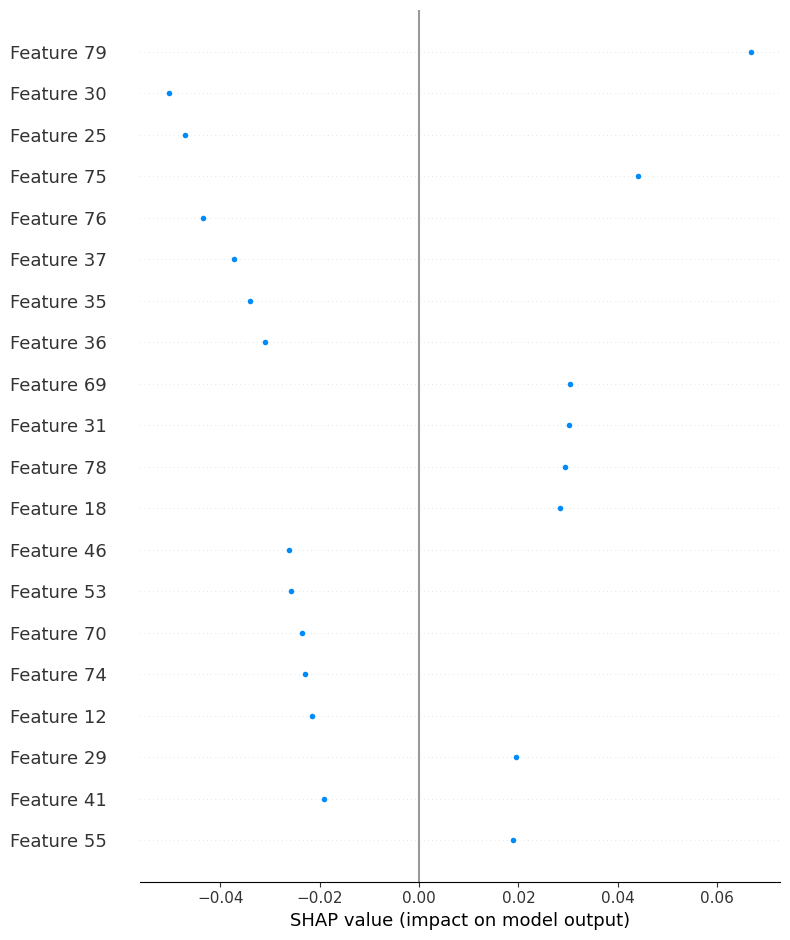

In [7]:
explainer = shap.Explainer(model , x_train[:10])
explanation = explainer.shap_values(x_test[:1])
shap.summary_plot(explanation)

In [1]:
ex = shap.KernelExplainer(model.predict , x_train)
shap.initjs()
explanation = ex(x_test[:10])
shap.plots.force(explanation)

NameError: name 'shap' is not defined